In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
WTP = "$WTP_{i,w}$"

In [33]:
evolution_log = pd.read_csv("evolution_log.csv")
event_history = pd.read_csv("event_history.csv")
price_matrix = pd.read_csv("price_matrix.csv")

## Event History

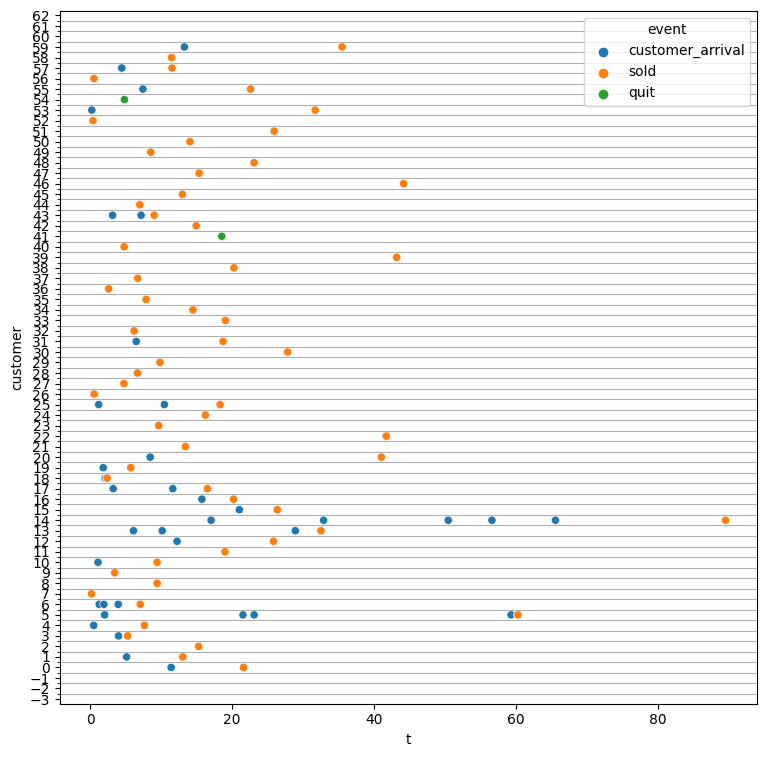

In [4]:
fig, ax = plt.subplots(figsize=(9, 9))
sns.scatterplot(x="t", y="customer", data=event_history, hue="event", ax=ax)
ax.grid(axis="y")
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_ylim(ax.get_ylim()[0] - 0.5, ax.get_ylim()[1] + 0.5)
ax.yaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(
    plt.MultipleLocator(0.5)
)
ax.grid(True, axis="y", which="minor")
ax.grid(False, axis="y", which="major")
plt.show()

/home/laurinbrechter/.local/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


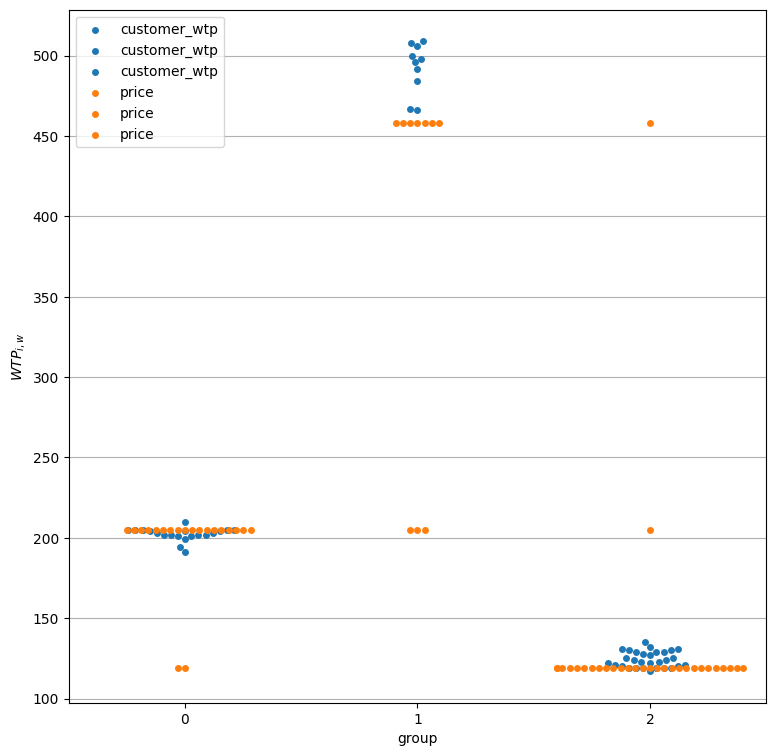

In [5]:
quit_sold = event_history.loc[event_history["event"].isin(["sold", "quit"])]
fig, ax = plt.subplots(figsize=(9, 9))
sns.swarmplot(x="group", y="customer_wtp", data=quit_sold, ax=ax, label="customer_wtp")
sns.swarmplot(x="group", y="price", data=quit_sold, ax=ax, label="price")
ax.grid(axis="y")
ax.set_ylabel(WTP)
plt.show()

In [7]:
quit_sold = event_history.loc[event_history["event"].isin(["sold", "quit"])]

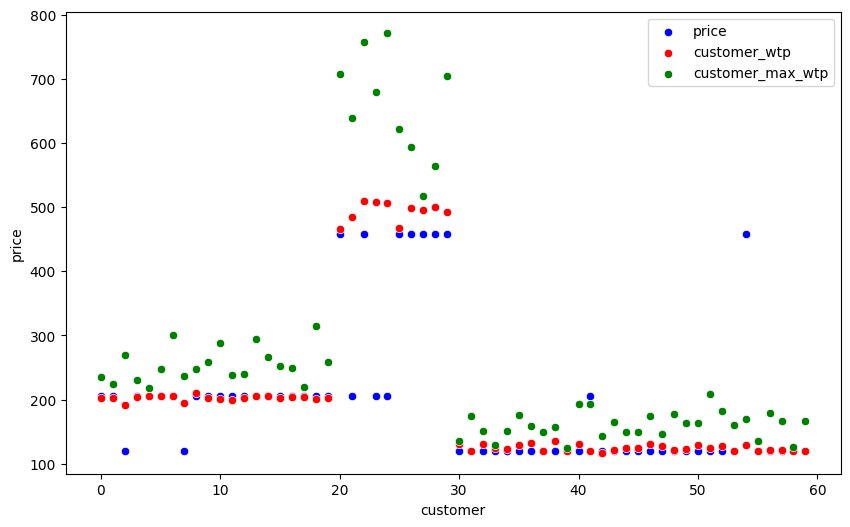

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x="customer", y="price", data=quit_sold, color='blue', label='price', ax=ax)
sns.scatterplot(
    x="customer", y="customer_wtp", data=quit_sold, color='red', label='customer_wtp', ax=ax
)
sns.scatterplot(
    x="customer", y="customer_max_wtp", data=quit_sold, color='green', label='customer_max_wtp', ax=ax
)
plt.legend()

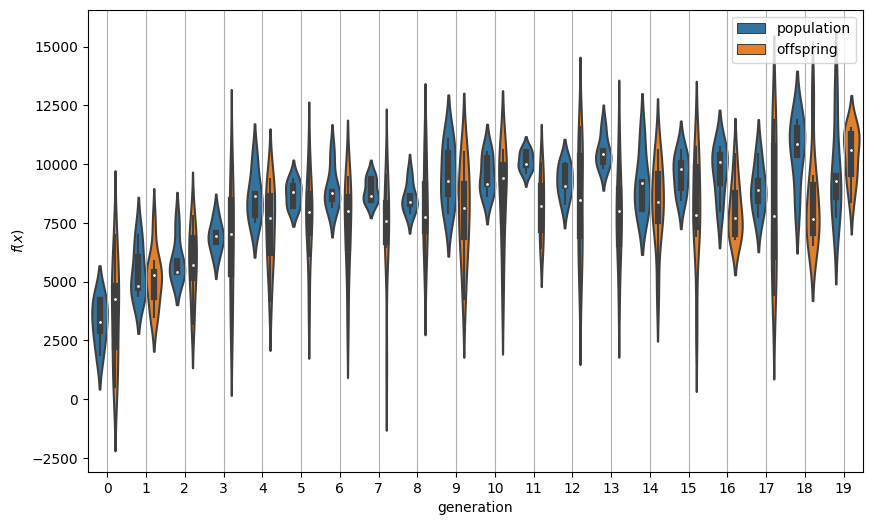

In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.violinplot(
    x="generation",
    y="score",
    data=evolution_log,
    hue="type",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

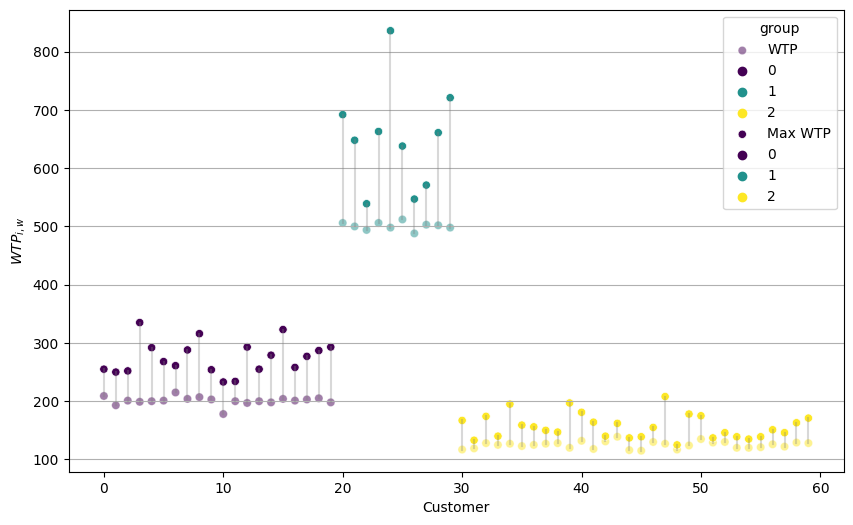

In [6]:
customers = event_history.drop_duplicates(subset=["customer"])

fig, ax = plt.subplots(figsize=(10, 6))

# First plot the scatter points
sns.scatterplot(
    x="customer",
    y="customer_wtp",
    data=customers,
    hue="group",
    label="WTP",
    palette="viridis",
    alpha=0.5,
)
sns.scatterplot(
    x="customer",
    y="customer_max_wtp",
    data=customers,
    hue="group",
    label="Max WTP",
    palette="viridis",
    alpha=1,
)

# Add lines connecting the points for each customer
for _, customer in customers.iterrows():
    ax.plot(
        [customer.customer, customer.customer],
        [customer.customer_wtp, customer.customer_max_wtp],
        color="gray",
        alpha=0.3,
        linestyle="-",
    )

ax.set_xlabel("Customer")
ax.grid(axis="y")
ax.set_ylabel(WTP)
plt.show()

## WTP changes

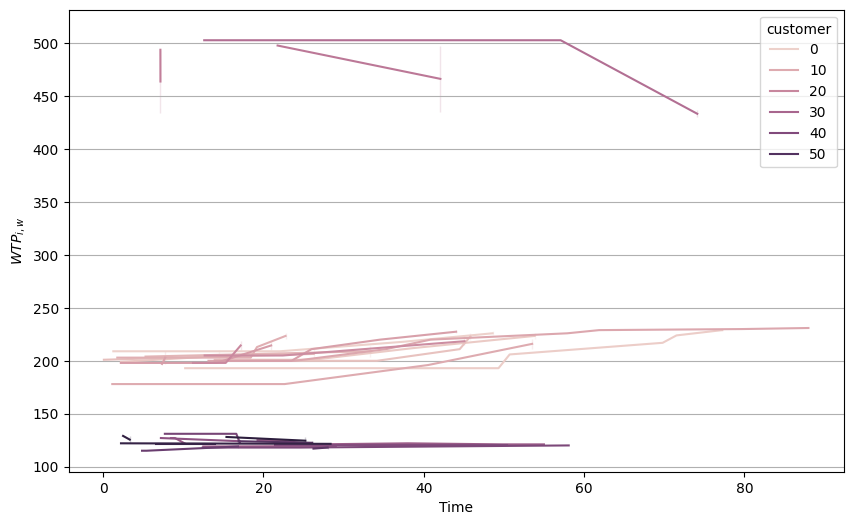

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x="t", y="customer_wtp", data=event_history, hue="customer")
ax.set_xlabel("Time")
ax.set_ylabel(WTP)
ax.grid(axis="y")
plt.show()

# Price Matrix

In [6]:
price_matrix.pivot(index="group", columns="visit", values="price")

visit,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
group,,,,,,,,,,,
0,NaN,205.922882,NaN,85.826644,97.763490,128.496502,423.700863,17.928374,119.447680,195.854155,70.359979
1,NaN,458.916089,219.746067,0.000000,165.552746,199.133060,0.000000,200.025320,245.301145,86.691878,89.405223
2,NaN,119.814693,90.852227,425.502202,319.609351,0.000000,0.000000,6.110741,140.152899,105.583628,160.111443
6257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Sensitivity Analysis

## Comma vs Plus

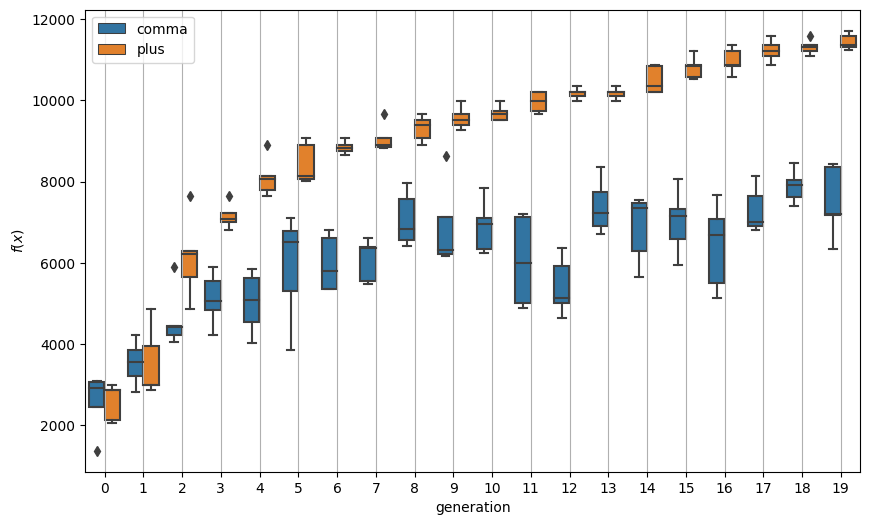

In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    x="generation",
    y="score",
    data=evolution_log.loc[evolution_log["type"] == "population"],
    hue="selection",
    ax=ax,
)
ax.legend()
ax.set_ylabel("$f(x)$")
ax.grid(axis="x")
plt.show()

In [34]:
evolution_log

,generation,type,individual,score,lambda,mu,p,selection,mutation_probability,mutation_stddev
0,0,population,0,2922.807635,10,5,2,comma,0.5,100
1,0,population,1,1372.209185,10,5,2,comma,0.5,100
2,0,population,2,3055.190279,10,5,2,comma,0.5,100
3,0,population,3,2453.359169,10,5,2,comma,0.5,100
4,0,population,4,3100.551449,10,5,2,comma,0.5,100
...,...,...,...,...,...,...,...,...,...,...
595,19,offspring,200,9760.051178,10,5,2,plus,0.5,100
596,19,offspring,201,7958.184464,10,5,2,plus,0.5,100
597,19,offspring,202,8801.953973,10,5,2,plus,0.5,100
598,19,offspring,203,9154.123175,10,5,2,plus,0.5,100
